<a href="https://colab.research.google.com/github/rj-pal/CEFR-text-classification/blob/main/2_data_modelling_keras_one_stop_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Mar  2 22:24:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# !cp /content/drive/My\ Drive/data/English/preprocessing_nlp.py

In [ ]:
import sys
sys.path.append('drive/MyDrive/data/English')

In [ ]:
# !pip install -r requirements.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import preprocessing_nlp as pp
# import cleaning_nlp as cc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
url_train = 'https://raw.githubusercontent.com/rj-pal/CEFR-text-classification/main/data/one_stop_train.csv'
url_test = 'https://raw.githubusercontent.com/rj-pal/CEFR-text-classification/main/data/one_stop_test.csv'
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)


In [ ]:
df_train

,index,documents,doc_list,avg_num_words,total_num_sents,total_num_words,words_per_sents,level,doc_id
0,0,SeaWorld's profits fell by 84% and customers a...,['SeaWorld’s profits fell by 84% and customers...,25.00,1,25,[25],Ele,0
1,1,The company teaches dolphins and killer whales...,['The company teaches dolphins and killer whal...,17.00,1,17,[17],Ele,0
2,2,It says fewer people are going to its parks an...,['It says fewer people are going to its parks ...,13.00,1,13,[13],Ele,0
3,3,SeaWorld has been in the news since the 2013 d...,['SeaWorld has been in the news since the 2013...,33.00,1,33,[33],Ele,0
4,4,Animal rights organizations say that orcas kep...,['Animal rights organizations say that orcas k...,14.00,2,28,"[17, 11]",Ele,0
...,...,...,...,...,...,...,...,...,...
6545,7390,One major problem is complicity between senior...,['One major problem is complicity between seni...,26.00,3,78,"[15, 32, 31]",Adv,566
6546,7391,As the number of tigers has increased over the...,['As the number of tigers has increased over t...,19.25,4,77,"[17, 21, 14, 25]",Adv,566
6547,7392,Wildlife authorities captured a tiger in Chitw...,['Wildlife authorities captured a tiger in Chi...,19.00,4,76,"[23, 12, 14, 27]",Adv,566
6548,7393,"Diwakar Chapagain, who heads a World Wildlife ...","['Diwakar Chapagain, who heads a World Wildlif...",30.00,1,30,[30],Adv,566


In [ ]:
d_train = df_train[['documents', 'level']]
d_test = df_test[['documents', 'level']]

In [ ]:
d_train.shape, d_test.shape

((6550, 2), (845, 2))

In [ ]:
sentence_data_train = pp.get_sentences_dataframe(d_train, 'documents', 'level')
sentence_data_test = pp.get_sentences_dataframe(d_test, 'documents', 'level')

In [ ]:
df_processed_train = pp.preprocess_all(sentence_data_train, 'documents', stop_words=True)
df_processed_test = pp.preprocess_all(sentence_data_test, 'documents', stop_words=True)

In [ ]:
df_processed_train

,documents,num_of_words,level,doc_id,documents_clean,Lemmatized,Stemmed
0,SeaWorld's profits fell by 84% and customers a...,25,Ele,0,seaworld profits fell customers staying away w...,seaworld profit fell customer staying away wat...,seaworld profit fell custom stay away water th...
1,The company teaches dolphins and killer whales...,17,Ele,1,company teaches dolphins killer whales tricks ...,company teach dolphin killer whale trick front...,compani teach dolphin killer whale trick front...
2,It says fewer people are going to its parks an...,13,Ele,2,says fewer people going parks profits reduced,say fewer people going park profit reduced,say fewer peopl go park profit reduc
3,SeaWorld has been in the news since the 2013 d...,33,Ele,3,seaworld news since thedocumentary film blackf...,seaworld news since thedocumentary film blackf...,seaworld news sinc thedocumentari film blackfi...
4,Animal rights organizations say that orcas kep...,17,Ele,4,animal rights organizations say orcas kept tan...,animal right organization say orca kept tank d...,anim right organ say orca kept tank die younge...
...,...,...,...,...,...,...,...
17718,Chitwan National Park in central Nepal has the...,27,Adv,6547,chitwan national park central nepal highest nu...,chitwan national park central nepal highest nu...,chitwan nation park central nepal highest numb...
17719,"Diwakar Chapagain, who heads a World Wildlife ...",30,Adv,6548,diwakar chapagain heads world wildlife fund ne...,diwakar chapagain head world wildlife fund nep...,diwakar chapagain head world wildlif fund nepa...
17720,"In Nepal, kings used to stand on tiger skins i...",17,Adv,6549,nepal kings used stand tiger skins front stuff...,nepal king used stand tiger skin front stuffed...,nepal king use stand tiger skin front stuf tig...
17721,Some affluent Nepali have mounted tiger heads ...,14,Adv,6549,affluent nepali mounted tiger heads walls livi...,affluent nepali mounted tiger head wall living...,affluent nepali mount tiger head wall live room


In [ ]:
data_train = df_processed_train[['Lemmatized', 'level']]
data_test = df_processed_test[['Lemmatized', 'level']]

In [ ]:
r = max(data_train.Lemmatized.values.tolist())
len(r)

88

In [ ]:
s = [sen for sen in data_train.Lemmatized.values.tolist()]


In [ ]:
ws = [words for sen in data_train.Lemmatized.values.tolist() for words in sen.split()]
wl = [len(word) for word in ws]
max(wl)

40

In [ ]:
# df
sl = [len(sen.split()) for sen in data_train.Lemmatized.values.tolist()]
sum(s for s in sl)/len(sl)

10.366077977769

In [ ]:
# sorted(sl)[::-1]

In [ ]:
w = [word for words in data_train.Lemmatized.values.tolist() for word in words.split() ]

In [ ]:
len(set(w))

14015

In [ ]:
y_integers = []
for level in data_train.level:
  if level == 'Ele':
    y_integers.append(0)
  elif level == 'Int':
    y_integers.append(1)
  else:
    y_integers.append(2)
data_train['level'] = y_integers

y_integers = []
for level in data_test.level:
  if level == 'Ele':
    y_integers.append(0)
  elif level == 'Int':
    y_integers.append(1)
  else:
    y_integers.append(2)
data_test['level'] = y_integers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data_train.groupby('level').count()

,Lemmatized
level,
0,5183
1,6109
2,6431


In [ ]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, LSTM, Reshape, Embedding, TextVectorization

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 8000
# Max number of words in each sentence.
MAX_SEQUENCE_LENGTH = 40
# This is fixed for LSTM layer.
EMBEDDING_DIM = 105
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_train['Lemmatized'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 14014 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(data_train['Lemmatized'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (17723, 40)


In [ ]:
X_test = tokenizer.texts_to_sequences(data_test['Lemmatized'].values)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)


In [ ]:
y = to_categorical(data_train['level'].values)
y_test = to_categorical(data_test['level'].values)

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(105, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 100
batch_size = 32
# epochs = 1
# batch_size = 512
#monitor='val_accuracy', mode='max', min_delta=1 monitor='loss', patience=3, min_delta=0.0001
history = model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='loss', patience=3, min_delta=0.0001)])


Epoch 1/100
554/554 [==============================] - 143s 248ms/step - loss: 1.0659 - accuracy: 0.3896 - val_loss: 1.1413 - val_accuracy: 0.3217
Epoch 2/100
554/554 [==============================] - 125s 227ms/step - loss: 0.9518 - accuracy: 0.5047 - val_loss: 1.2785 - val_accuracy: 0.3329
Epoch 3/100
554/554 [==============================] - 124s 225ms/step - loss: 0.8616 - accuracy: 0.5629 - val_loss: 1.4281 - val_accuracy: 0.3043
Epoch 4/100
554/554 [==============================] - 125s 226ms/step - loss: 0.7990 - accuracy: 0.5972 - val_loss: 1.6940 - val_accuracy: 0.2993
Epoch 5/100
554/554 [==============================] - 124s 224ms/step - loss: 0.7463 - accuracy: 0.6236 - val_loss: 1.7864 - val_accuracy: 0.2828
Epoch 6/100
554/554 [==============================] - 126s 228ms/step - loss: 0.7010 - accuracy: 0.6448 - val_loss: 1.9582 - val_accuracy: 0.2711
Epoch 7/100
554/554 [==============================] - 126s 227ms/step - loss: 0.6657 - accuracy: 0.6588 - val_loss: 2

In [ ]:
_, train_acc = model.evaluate(X, y, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.858, Test: 0.251


In [ ]:
accr = model.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

70/70 [==============================] - 1s 16ms/step - loss: 6.1552 - accuracy: 0.2510
Test set
  Loss: 6.155
  Accuracy: 0.251


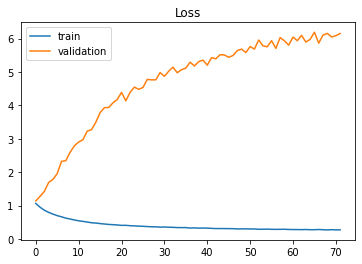

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

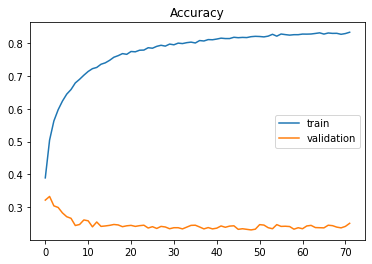

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show();